In [26]:
#Name: Chaeyoon Kim
#City Email: Chaeyoon.Kim@city.ac.uk

***Supported by the Public Data Portal for the Daily Interregional Traffic Control System (TCS) data [1] and the Daegu Metropolitan Transit Corporation (DTRO) for the Passengers data [2, 3]***

[1]	Public Data Portal, https://www.data.go.kr/, linked to the Korea Expressway Corporation (KEC, https://www.ex.co.kr/eng/) [Online]. Available at:  http://data.ex.co.kr/portal/fdwn/view?type=TCS&num=C5&requestfrom=dataset# [Accessed 6 January 2020]

[2]	Public Data Portal, “대구도시철도공사_역별일별시간별승하차인원현황(DTRO_daily passengers at station) in 2020” [Online]. Available at: https://www.data.go.kr/data/15002503/fileData.do [Accessed 6 January 2020]

[3]	Public Data Portal, “대구도시철도공사_월별하차인원(DTRO_monthly outbound passengers) from 2006 to 2020” [Online]. Available at: https://www.data.go.kr/data/15060372/fileData.do [Accessed 6 January 2020] 

In [1]:
import urllib.request
import requests

from csv import reader
import numpy as np
import pandas as pd
from datetime import datetime
import warnings; warnings.simplefilter('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = 'font/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
from IPython.core.display import Image, display
from IPython.display import IFrame, HTML

In [2]:
data1 = pd.read_csv("DTRO_daily passengers at station.csv")
data2 = pd.read_csv("DTRO_monthly outbound passengers.csv")

In [3]:
data1.head(3)

,Month,Day,Station_number,Station_name,Inbound_Outbound,05~06,06~07,07~08,08~09,09~10,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,Daily_Total
0,2,1,1150,설화명곡,승차,47,91,160,308,324,...,289,274,306,264,131,107,94,62,10,4034
1,2,1,1150,설화명곡,하차,2,86,122,154,127,...,200,254,281,307,201,189,192,225,149,3397
2,2,1,1160,화원,승차,41,50,127,270,286,...,316,268,309,193,117,91,73,56,16,3995


In [4]:
data2.head(3)

,Year,Month,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이회관,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0


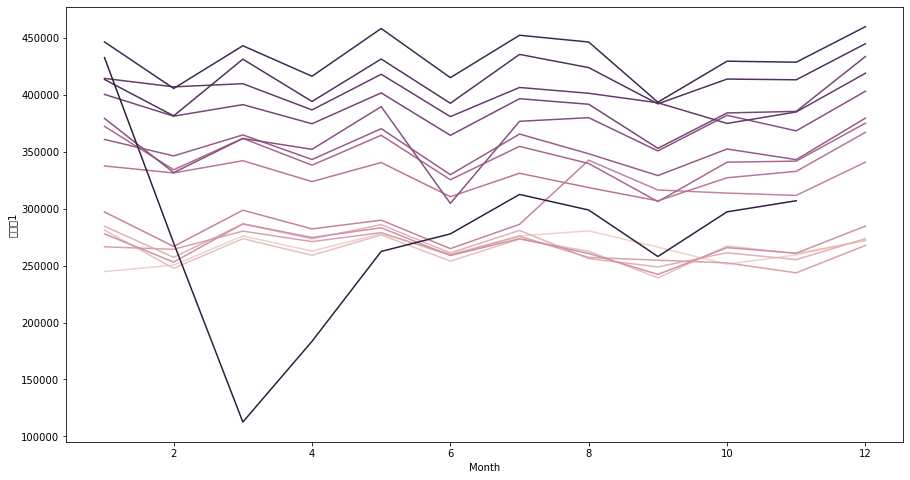

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Month", y="반월당1", hue="Year", data=data2, legend=False, ax=ax)

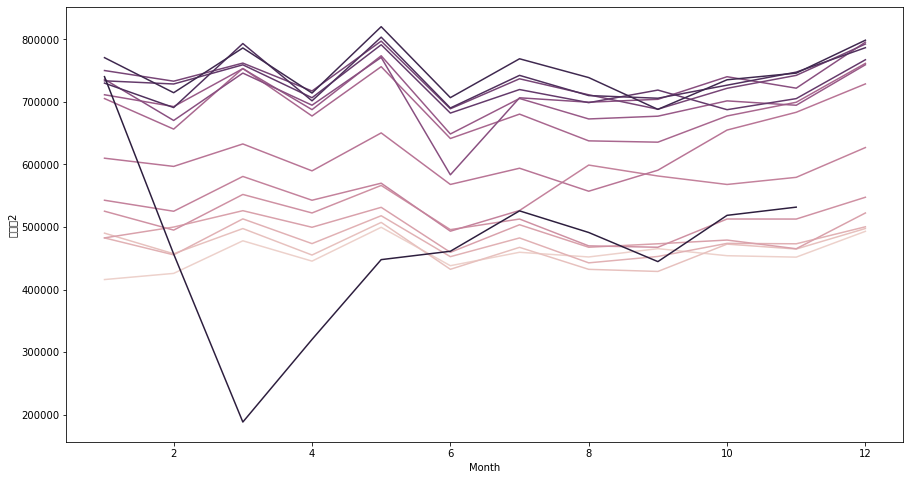

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Month", y="반월당2", hue="Year", data=data2, legend=False, ax=ax)

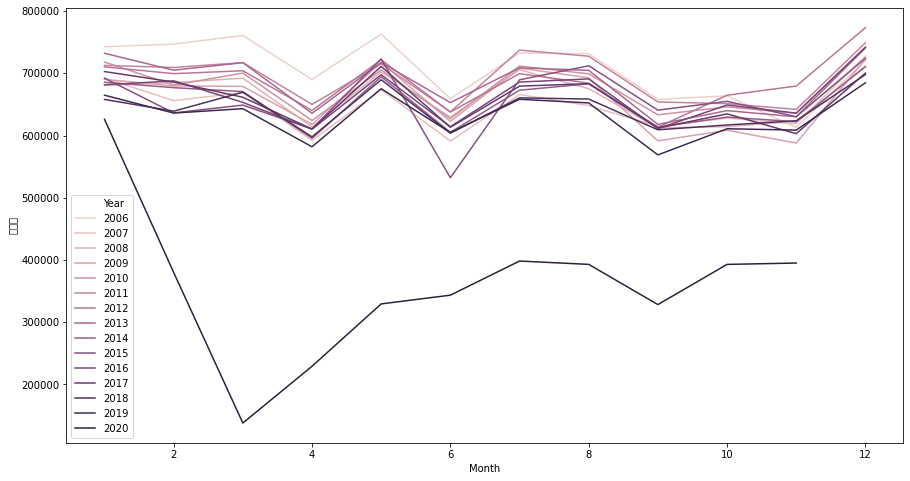

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Month", y="중앙로", hue="Year", data=data2, legend="full", ax=ax)

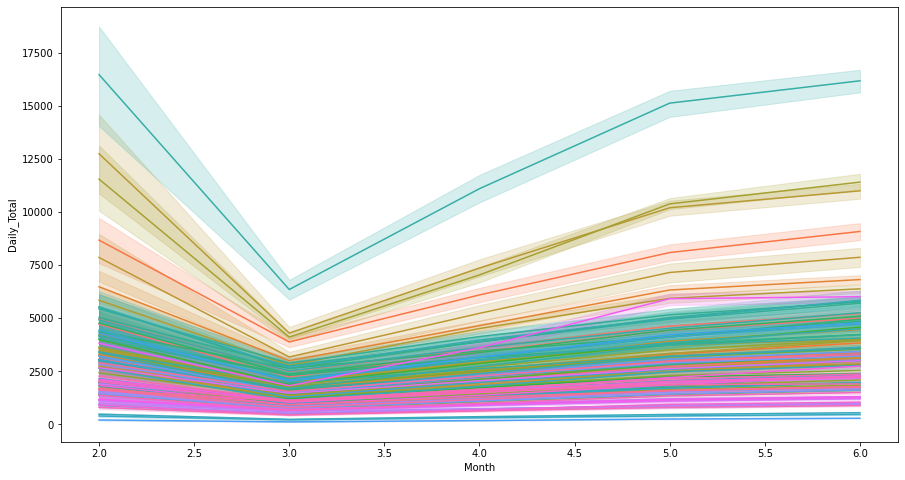

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Month", y="Daily_Total", hue="Station_name", data=data1, legend=False, ax=ax)

In [9]:
import glob, os    
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "TCS_*.csv"))))

In [10]:
df.head()

,Date,Departure,Arrival_Capital,Arrival_Gangwon,Arrival_DaejeonChungnam,Arrival_GwangjuJeonnam,Arrival_DaeguGyeongbuk,Arrival_BusanGyeongnam,Arrival_Jeonbuk,Arrival_Chungbuk,Column1
0,20200201,Capital,377719,44066,63864,3745,9618,5868,8739,43068,NaN
1,20200201,Gangwon,45136,97859,2165,547,2293,671,680,12229,NaN
2,20200201,DaejeonChungnam,63337,2427,96883,4884,9096,4226,25146,13470,NaN
3,20200201,GwangjuJeonnam,2829,443,4128,147891,3616,13064,19717,1105,NaN
4,20200201,DaeguGyeongbuk,8204,2196,8340,3791,212161,32090,2056,8881,NaN


In [11]:
df.Arrival_Capital.dtypes

dtype('int64')

In [12]:
df.drop(columns = ["Column1"], axis = 1, inplace = True)

In [13]:
df.Date = pd.to_datetime(df['Date'], format='%Y%m%d')

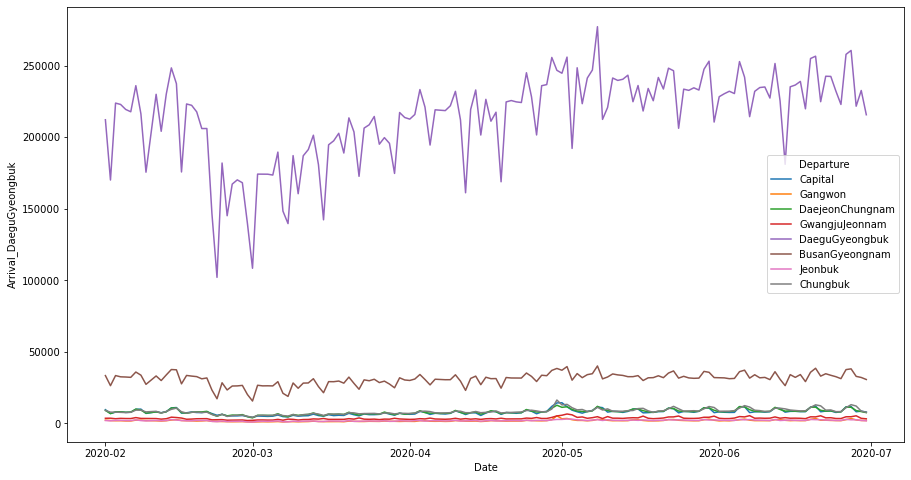

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Date", y="Arrival_DaeguGyeongbuk", hue="Departure", data=df, ax=ax)

In [15]:
df.loc[:, "Departure"].unique()

array(['Capital', 'Gangwon', 'DaejeonChungnam', 'GwangjuJeonnam',
       'DaeguGyeongbuk', 'BusanGyeongnam', 'Jeonbuk', 'Chungbuk'],
      dtype=object)

In [16]:
departure_encoding = {"Capital": 1, "Gangwon": 2, "DaejeonChungnam": 3, "GwangjuJeonnam": 4, "DaeguGyeongbuk": 5, "BusanGyeongnam": 6, "Jeonbuk": 7, "Chungbuk": 8}
df.loc[:, "Departure"] = df.loc[:, "Departure"].map(lambda x: departure_encoding[x])

In [17]:
df.head(3)

,Date,Departure,Arrival_Capital,Arrival_Gangwon,Arrival_DaejeonChungnam,Arrival_GwangjuJeonnam,Arrival_DaeguGyeongbuk,Arrival_BusanGyeongnam,Arrival_Jeonbuk,Arrival_Chungbuk
0,2020-02-01,1,377719,44066,63864,3745,9618,5868,8739,43068
1,2020-02-01,2,45136,97859,2165,547,2293,671,680,12229
2,2020-02-01,3,63337,2427,96883,4884,9096,4226,25146,13470


In [18]:
Capital = df[df.Departure == 1]
DaeguGyeongbuk = df[df.Departure == 5]

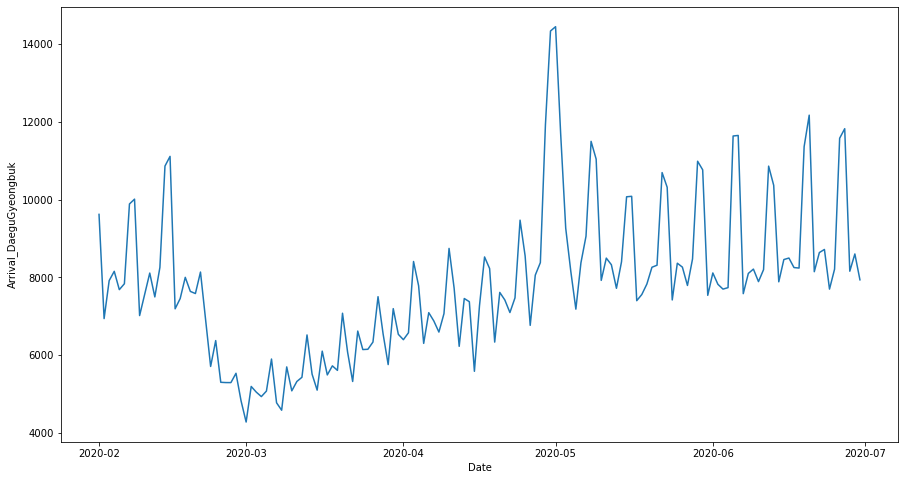

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Date", y="Arrival_DaeguGyeongbuk", data=Capital, ax=ax)
#g.set(ylim=(4000, 15000))

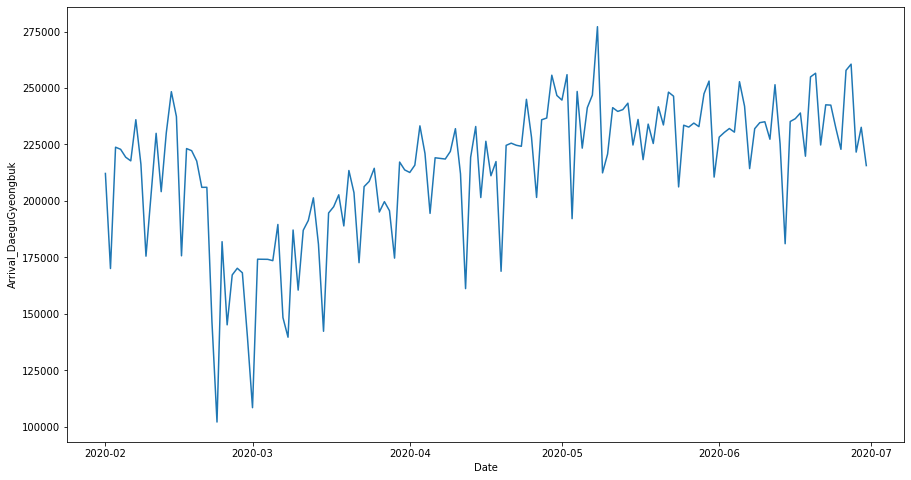

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
g = sns.lineplot(x="Date", y="Arrival_DaeguGyeongbuk", data=DaeguGyeongbuk, ax=ax)

In [21]:
(Capital.mean() - Capital.min())/Capital.mean()*100

Arrival_BusanGyeongnam     28.093584
Arrival_Capital            45.866991
Arrival_Chungbuk           39.741357
Arrival_DaeguGyeongbuk     45.503716
Arrival_DaejeonChungnam    31.611431
Arrival_Gangwon            38.599289
Arrival_GwangjuJeonnam     40.988272
Arrival_Jeonbuk            40.038866
Date                             NaN
Departure                   0.000000
dtype: object

In [22]:
(DaeguGyeongbuk.mean() - DaeguGyeongbuk.min())/DaeguGyeongbuk.mean()*100

Arrival_BusanGyeongnam     53.224053
Arrival_Capital            49.517919
Arrival_Chungbuk           51.447686
Arrival_DaeguGyeongbuk     52.361964
Arrival_DaejeonChungnam    53.938831
Arrival_Gangwon            57.833483
Arrival_GwangjuJeonnam     50.566137
Arrival_Jeonbuk            60.195339
Date                             NaN
Departure                   0.000000
dtype: object

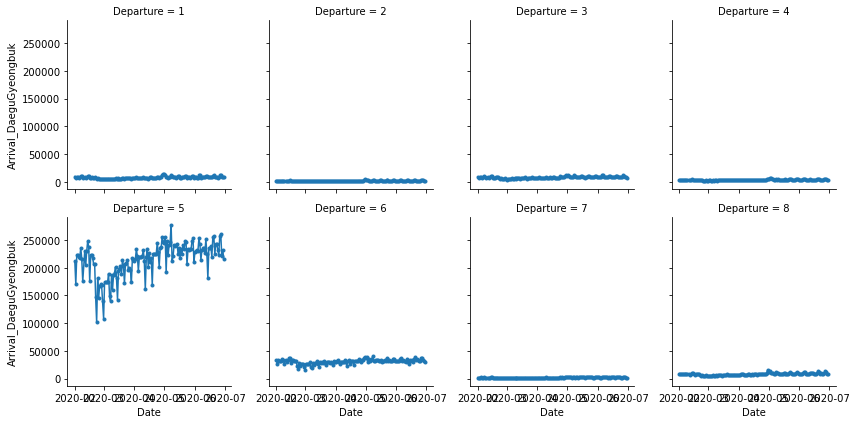

In [23]:
g = sns.FacetGrid(df.groupby(['Date','Departure']).Arrival_DaeguGyeongbuk.sum().reset_index(), col='Departure', col_wrap=4)
g = g.map(plt.plot, 'Date', 'Arrival_DaeguGyeongbuk', marker='.')

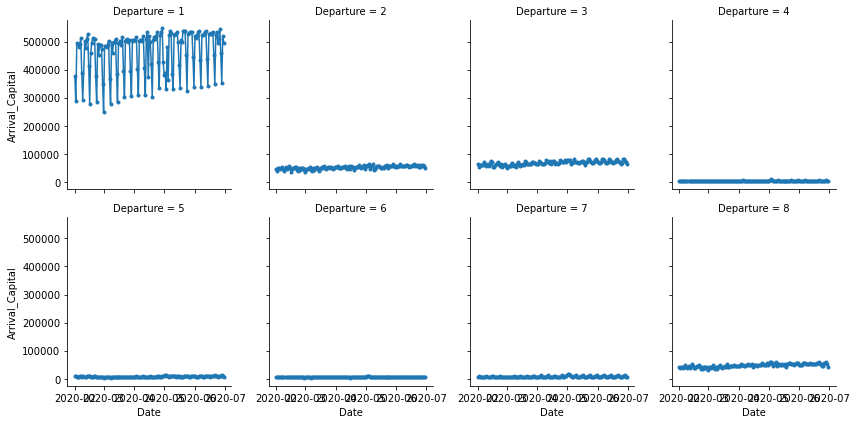

In [24]:
g = sns.FacetGrid(df.groupby(['Date','Departure']).Arrival_Capital.sum().reset_index(), col='Departure', col_wrap=4)
g = g.map(plt.plot, 'Date', 'Arrival_Capital', marker='.')
#g.set(ylim=(1000, 12000))

In [25]:
#df[df.Arrival_Capital == df.Arrival_Capital.max()] #2월10일 outlier 제외